<a href="https://colab.research.google.com/github/myihbach/Statistical_Learning_labs/blob/main/LDA_statistical_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP 5 : Analyse discriminante linéaire (LDA)**
Submitted by: **IHBACH** Mohamed Yassine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

### Matrices de deformmation et de rotation

In [ ]:
s1 = np.array([[3,0,0],[0,1,0],[0,0,0.01]])  # matrice de déformation
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])  # matrice de rotation

## Question 1 : Géneration et déformation des nuages

In [ ]:
#Generation de nuages
nuage1 = np.random.randn(500,3)
nuage2 = np.random.randn(500,3)

#Deformation de nuages
nuage1 = nuage1.dot(s1).dot(r1)
# en plus de deformation , une translation de nuage 2 selon l'axe Z 
nuage2 = nuage2.dot(s1).dot(r1) + [0,0,1]
# concatenation de nuage1 et nuage2
nuage = np.concatenate((nuage1,nuage2)) # size 1000,3


## Question 2 : étiquetage des données , classe 1 et 2

In [ ]:
# Les etiquettes des nuages 
etiquete = np.concatenate((np.ones(500),2*np.ones(500)))


## Question 3


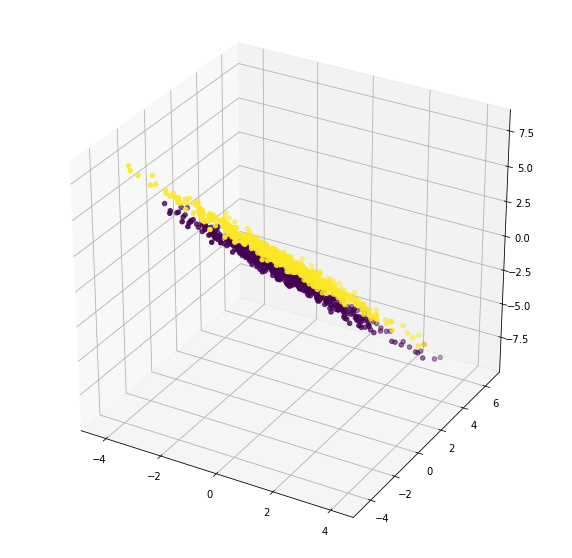

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nuage[:,0],nuage[:,1],nuage[:,2],c=etiquete)
fig.show()


## Question 4

Methode 1 : selon l'enoncé du TP

In [ ]:
"""
#Nuage d'entrainement et leur etiquette
nuage_train = np.concatenate((nuage[0:350,:],nuage[500:850,:]))
et_train = np.concatenate((etiquete[0:350],etiquete[500:850]))
#Nuage de test et leur etiquette
nuage_test = np.concatenate((nuage[350:500,:] , nuage[850:1000,:]))
et_test = np.concatenate((etiquete[350:500],etiquete[850:1000]))
"""


"\n#Nuage d'entrainement et leur etiquette\nnuage_train = np.concatenate((nuage[0:350,:],nuage[500:850,:]))\net_train = np.concatenate((etiquete[0:350],etiquete[500:850]))\n#Nuage de test et leur etiquette\nnuage_test = np.concatenate((nuage[350:500,:] , nuage[850:1000,:]))\net_test = np.concatenate((etiquete[350:500],etiquete[850:1000]))\n"

Methode 2 : par la methode train_test_split avec shuffle

In [ ]:
# train size = 0.7 <=> 350 données de 500  et test size =0.3 <=> 150 données de 500 
nuage_train, nuage_test, et_train, et_test = train_test_split(nuage,etiquete,test_size=0.3,shuffle=True)

## Question 5 : Appliquation de l'analyse discriminante sur les données de test

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(nuage_train,et_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Question 6

##**model.means_** : Contient les moyennes de chaque classe pour chaque predicteur

## **model.priors_** : Les probabilités apriori des classes

## **model.coef_** : Vecteur de poids et peut être interpreter dans ce cas comme le vecteur normal du plan qui separe le mieux les deux classes

In [ ]:
print('Means : ',model.means_) # les moyennes de chaque classe pour chaque predicteur
print('Coef : ',model.coef_) # les coeficients de vecteur directeur de l'hyperplace qui separe le mieux les classes
print('Priors : ',model.priors_) # les probabilité apriori

Means :  [[ 0.00259874  0.10746663 -0.11835048]
 [ 0.01535304 -0.01181681  1.00125315]]
Coef :  [[2948.98776292 3928.04819985 3683.74927428]]
Priors :  [0.49142857 0.50857143]


## Question 7 : La prediction sur les données de test

In [ ]:
prediction = model.predict(nuage_test)
print(prediction)

[1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1.
 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2.
 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1.
 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2.
 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2.
 2. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]


In [ ]:
confusion_matrix(et_test,prediction)

array([[156,   0],
       [  0, 144]])

### Tous les élements de la matrice de confusion sont nuls sauf le diagonal, c-à-d le classifieur arrive à classifier tous les données de test sans erreur.

In [ ]:
print(classification_report(et_test,prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       156
         2.0       1.00      1.00      1.00       144

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



$ Precision = \frac{TP}{TP + FP}~~~~$ avec $~~TP$ : True positive et $~~FP$ : False positive 
<br>
La précision est la capacité d'un classificateur à ne pas étiqueter une instance positive qui est en fait négative. Pour chaque classe, il est défini comme le rapport des vrais positifs à la somme d'un vrai positif et d'un faux positif.

$ Recall = \frac{TP}{TP + FN}~~~~$ avec $~~TP$ : True positive et $~~FN$ : False negative
<br>
Recall est la capacité d'un classificateur à trouver toutes les instances positives. Pour chaque classe, il est défini comme le rapport des vrais positifs à la somme des vrais positifs et des faux négatifs.

$ F1~Score = \frac{2 ~( Recall ~*~ Precisino )}{Recall ~+~ Precision}$



Les classes sont bien séparées grâce a la translation qu'on a fait sur le nuage1 d'où la separabilité totale des classes ce qui est donné par la matrice de confusion diagonale.